# Training and testing my model using multiple linear regression

Installing libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sqlite3
import pickle

### Gathering the cleaned up data from the database

In [45]:
# Global variables
dbPath = "../database"

# Collecting the data
# Specify the con
con = sqlite3.connect(f'{dbPath}/db.sqlite3')
# Convert to DataFrame
df = pd.read_sql('SELECT * FROM clean', con=con)

# doublecheck
df.describe()

,genetic,exercise,smoking,alcohol,lifespan,sugar,bmi
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,2.403477,9.809035,2.266846,80.177693,6.487169,27.682023
std,7.441333,1.170426,6.918614,1.801044,7.840508,2.708622,8.711736
min,63.900000,0.100000,0.000000,0.000000,57.000000,0.700000,11.320000
25%,77.600000,1.500000,3.375000,0.600000,75.000000,4.400000,20.937500
50%,81.800000,2.200000,9.500000,1.700000,79.700000,6.300000,26.475000
75%,86.700000,3.200000,15.900000,4.000000,85.200000,8.400000,33.207500
max,102.200000,5.500000,22.200000,6.000000,105.100000,13.800000,65.870000


In [46]:
# Collecting the data
# Convert to DataFrame
df2 = pd.read_sql('SELECT * FROM iqr', con=con)

# doublecheck
df2.describe()

,genetic,exercise,smoking,alcohol,lifespan,sugar,bmi
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000
mean,82.038823,2.404249,9.780639,2.269776,79.988358,6.484461,27.419427
std,7.087155,1.170096,6.910443,1.803397,7.453324,2.707867,8.306660
min,64.000000,0.100000,0.000000,0.000000,59.700000,0.700000,11.320000
25%,77.600000,1.500000,3.300000,0.600000,75.000000,4.400000,20.890000
50%,81.700000,2.200000,9.500000,1.700000,79.600000,6.300000,26.380000
75%,86.500000,3.200000,15.800000,4.000000,84.900000,8.400000,32.990000
max,100.300000,5.500000,22.200000,6.000000,100.400000,13.800000,51.550000


### Create x (independent) and y (dependent) for both dataframe's

In [47]:
# create x and y
x = df.drop(columns='lifespan')
y = df['lifespan']

display(x.head())
display(y.head())


,genetic,exercise,smoking,alcohol,sugar,bmi
0,73.9,0.9,0.0,2.4,6.9,29.13
1,86.0,1.8,8.1,0.4,4.2,35.63
2,83.3,1.1,0.8,4.6,7.5,35.96
3,82.8,4.7,11.8,1.0,2.9,41.42
4,78.7,1.5,8.3,4.9,5.5,22.60


0    73.1
1    85.0
2    81.6
3    81.0
4    75.0
Name: lifespan, dtype: float64

In [48]:
# create x2 and y2
x2 = df2.drop(columns='lifespan')
y2 = df2['lifespan']

display(x2.head())
display(y2.head())

,genetic,exercise,smoking,alcohol,sugar,bmi
0,73.9,0.9,0.0,2.4,6.9,29.13
1,86.0,1.8,8.1,0.4,4.2,35.63
2,83.3,1.1,0.8,4.6,7.5,35.96
3,82.8,4.7,11.8,1.0,2.9,41.42
4,78.7,1.5,8.3,4.9,5.5,22.60


0    73.1
1    85.0
2    81.6
3    81.0
4    75.0
Name: lifespan, dtype: float64

### Split the data 70% (to train) and 30% (to test)

-   To do this I use the train_test_split function from the sklearn.model_selection library and set the test_size to 0.3 (30%)

In [49]:
# split the data 30% - 70%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

### Fit the data for linear regression

- I first call in the linear regression model from the sklearn.linear_model library and save it in 2 variables (1 for each dataframe)
- I then fit the data I would like to train my data with using the .fit function from that same library

In [50]:
# apply linear regression
lr = LinearRegression()
lr2 = LinearRegression()

lr.fit(x_train, y_train)
lr2.fit(x2_train, y2_train)

LinearRegression()

### Doublecheck

In [51]:
# check the intercept
c = lr.intercept_
c2 = lr2.intercept_
display(c)
display(c2)

1.3821003632326807

1.0995027005735238

In [52]:
# check the coef.
m = lr.coef_
m2 = lr2.coef_

display(m)
display(m2)

array([ 1.00294272,  0.80750582, -0.2666997 , -0.22378814, -0.07197199,
       -0.07507703])

array([ 1.00325566,  0.79653911, -0.26134334, -0.22338515, -0.07275067,
       -0.06499291])

### First prediction!

- Now it's time to make the model's first prediction. I do this on the same data it trained on so I can compare and check the accuracy of the data.
- To make a predicion I use the .predict function from the sklearn.linear_model library, I save this function in a variable so I can use this later.

In [53]:
# train the models
y_pred_train = lr.predict(x_train)
y2_pred_train = lr2.predict(x2_train)

display(y_pred_train)
display(y2_pred_train)



array([72.20045027, 74.62135672, 67.52337722, ..., 73.5797182 ,
       76.07048003, 87.36705426])

array([86.74034441, 89.44635469, 98.38890611, ..., 73.42846654,
       85.27901677, 64.23622732])

### Plotting the result to check

- This lets me see how the predicted result versus the actual real data and how close they are to eachother.

<function matplotlib.pyplot.show(close=None, block=None)>

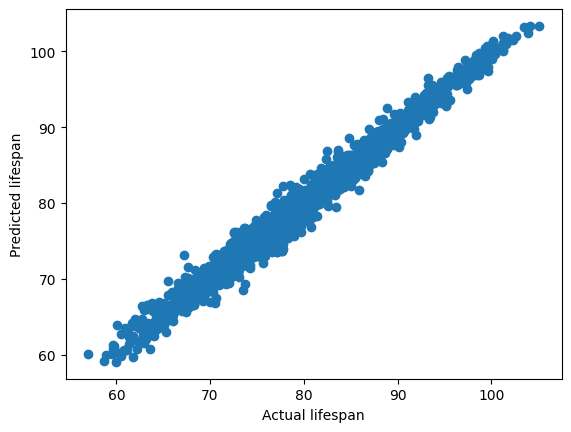

In [54]:
# plot the result
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

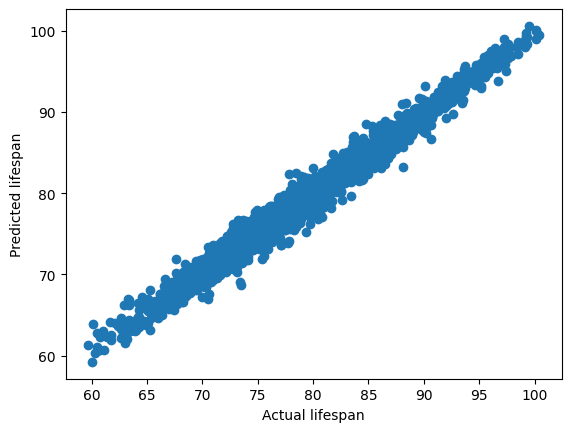

In [55]:
# Now with the second model
plt.scatter(y2_train, y2_pred_train)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

### Score both results

- To score the results I use the r2_score function from the sklearn.metrics library

In [56]:
# score the result
display(r2_score(y_train, y_pred_train))
display(r2_score(y2_train, y2_pred_train))

0.981089622174547

0.9798438961460364

### Now lets make the model predict something with data it hasn't seen yet!

- For this use the .predict function again but now I use the testing data I created earlier.

In [57]:
# test the data
y_pred_test = lr.predict(x_test)
y2_pred_test = lr2.predict(x2_test)

display(y_pred_test)
display(y2_pred_test)

array([74.99084677, 78.22560652, 84.73412979, ..., 65.87234222,
       79.2230896 , 75.76730693])

array([77.1269527 , 78.50021794, 93.76688864, ..., 63.71799457,
       79.2280516 , 89.28129617])

### Plot the test results.

<function matplotlib.pyplot.show(close=None, block=None)>

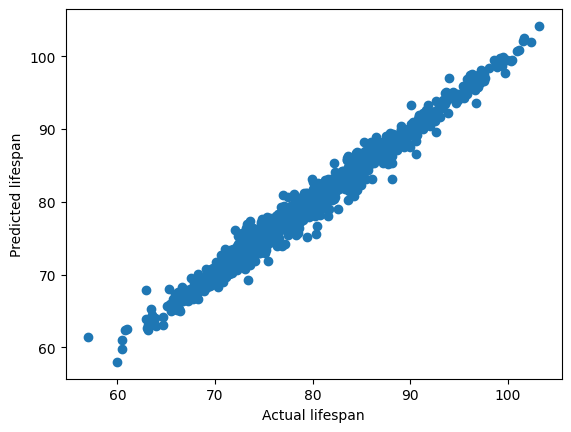

In [58]:
# plot the result
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

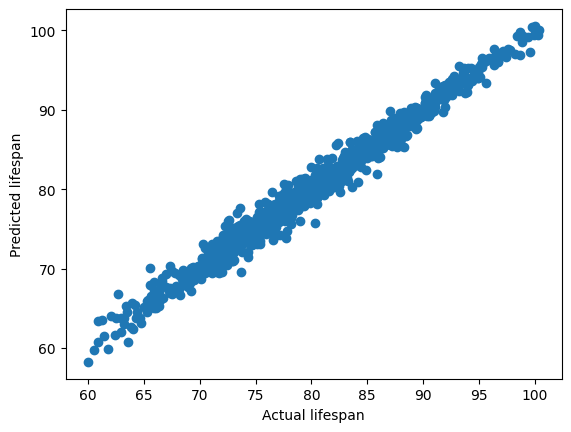

In [59]:
plt.scatter(y2_test, y2_pred_test)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

Here i notice how little difference there is between both models, for now I think my second model (lr2) is a little cleaner and looks most promising.

### Score the test results

In [60]:
# score the result
display(r2_score(y_test, y_pred_test))
display(r2_score(y2_test, y2_pred_test))

0.9786494264285226

0.9791095367737477

Interesting to see is that my iqr-model (lr2) scores higher in testing than it does in training. Since I want the prediction to be as high as possible with data it hasn't trained on I will use the lr2 model as it scores the highest and with my testing data.

### Testing the model with new data that I made up
- To make it easier for myself I will change my model lr2 to lr.
- To give my model a new dataframe I will create a dictionairy and use pandas to transform it to a dataframe.

In [61]:
lr = lr2

# genetic = 80
# exercise = 6
# smoking = 0
# alcohol = 1
# sugar = 2
# bmi = 20

# Creating new data as dictionairy
new_info = {'genetic': 80, 'exercise': 6, 'smoking': 0, 'alcohol': 1, 'sugar': 2, 'bmi': 20}

# Transform to dataframe
new_df = pd.DataFrame(data=new_info,index=[0])

# Predict!
lr.predict(new_df)

array([84.47044586])

### Save my model using the library pickle.
- I want to be able to use my model in my program, to do this I use the .dump function from the pickle library to dump it into a pickle file (basicly saving it).

In [64]:
# to use the model I just trained in my prototype I will save it with pickle
Ppath = '../pickle/'
with open(f'{Ppath}lifespan_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

### Close connection to database

- Here I wasn't sure if I had to leave the connection open till the last second but I figured it couldn't hurt to leave it open as long as it's closed in the end.

In [63]:
# close Connection
con.close()